In [95]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

In [104]:
#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)
count = 0

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    
    count += 1
    
avg_imgs = {}

# Calculate the Average Image for Each Digit
for i in range(0,10) :

    list_label_image = list_image[:,list_label == i]
    m = list_label_image.shape[1]
    avg_image = list_label_image.mean(axis=1)
    avg_imgs[i] = avg_image.reshape((size_row, size_col))
    
plt.show()
    

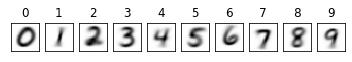

In [105]:
# Plot the Average Image for Each Digit
for i in range(0,10) :
    im_matrix = avg_imgs[i]
    plt.subplot(1,10,i+1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    

In [111]:
thetas = np.random.normal(0,1,size_row*size_col)

size_layer_1 = 10

thetas_to_layer_1 = torch.DoubleTensor(size_row*size_col,size_layer_1).normal_(0,1)
thetas_to_output = torch.DoubleTensor(size_layer_2,1).normal_(0,1)

avg_outputs = {}
for i in range(0,10) :
    
    list_label_vector = list_image[:,list_label==i]
    m = list_label_vector.shape[1]

    data = torch.DoubleTensor(list_label_vector).T
    y_layer_1 = torch.matmul(data,thetas_to_layer_1)
    z_output = 1 /  (1+torch.exp(-y_layer_1))

    avg_outputs[i] = z_output.mean()


## 1. Plot the average image

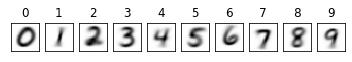

In [117]:
# Plot the Average Image for Each Digit
for i in range(0,10) :
    im_matrix = avg_imgs[i]
    plt.subplot(1,10,i+1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')
    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

## 2. Present the output of the neural network with random weights

In [118]:
for i in range(0,10) :
    print("Average Output on label {:d} : {:.5f}".format(i,avg_outputs[i]))

Average Output on label 0 : 0.45268
Average Output on label 1 : 0.45664
Average Output on label 2 : 0.50030
Average Output on label 3 : 0.43949
Average Output on label 4 : 0.36725
Average Output on label 5 : 0.41910
Average Output on label 6 : 0.45794
Average Output on label 7 : 0.43841
Average Output on label 8 : 0.44824
Average Output on label 9 : 0.39372
